In [65]:
class SvgPath:
    def __init__(self, contour):
        self.contour = contour
        self.path = self.generate_path()

    def generate_path(self):
        if len(self.contour) == 0:
            return ""
        path = "M"
        for i in range(len(self.contour)):
            x, y = self.contour[i][0]
            if i == len(self.contour) - 1:
                path += f"{float(x)},{float(y)}"
            else:
                path += f"{float(x)},{float(y)}L"
        path += "Z"
        return path

    def to_dict(self):
        return {
            "editable": True,
            "label": {"text": ""},
            "xref": "x",
            "yref": "y",
            "layer": "above",
            "opacity": 1,
            "line": {"color": "#444", "width": 4, "dash": "solid"},
            "fillcolor": "rgba(0,0,0,0)",
            "fillrule": "evenodd",
            "type": "path",
            "path": self.path
        }

In [66]:
import numpy as np
import cv2
from svgpathtools import Path, Line

# # Assume you have a mask image as a NumPy array
# mask_image = np.array([
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [1, 1, 1, 0, 1, 1, 1, 0],
#     [1, 1, 1, 0, 1, 1, 1, 0],
#     [1, 1, 1, 0, 1, 1, 1, 0],
#     [1, 1, 1, 0, 1, 1, 1, 0],
#     [1, 1, 1, 0, 1, 1, 1, 0],
#     [1, 1, 1, 0, 1, 1, 1, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0]
# ], dtype=np.uint8)

mask_image = cv2.imread("dataset_unique_masks/malignant/malignant (53)_mask.png", cv2.IMREAD_GRAYSCALE)
print(type(mask_image))

print(mask_image.shape)

# Find contours in the binary image
contours, _ = cv2.findContours(mask_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
print(contours.__len__())

svg_paths = []
for c in contours:
    svg_path = SvgPath(c)
    print(svg_path.to_dict())
    svg_paths.append(svg_path)

<class 'numpy.ndarray'>
(471, 569)
3
{'editable': True, 'label': {'text': ''}, 'xref': 'x', 'yref': 'y', 'layer': 'above', 'opacity': 1, 'line': {'color': '#444', 'width': 4, 'dash': 'solid'}, 'fillcolor': 'rgba(0,0,0,0)', 'fillrule': 'evenodd', 'type': 'path', 'path': 'M263.0,165.0Z'}
{'editable': True, 'label': {'text': ''}, 'xref': 'x', 'yref': 'y', 'layer': 'above', 'opacity': 1, 'line': {'color': '#444', 'width': 4, 'dash': 'solid'}, 'fillcolor': 'rgba(0,0,0,0)', 'fillrule': 'evenodd', 'type': 'path', 'path': 'M229.0,84.0L224.0,85.0L219.0,86.0L215.0,87.0L199.0,95.0L197.0,97.0L189.0,101.0L172.0,101.0L169.0,103.0L167.0,103.0L158.0,108.0L156.0,108.0L152.0,110.0L150.0,112.0L145.0,114.0L143.0,116.0L140.0,117.0L137.0,119.0L134.0,121.0L131.0,123.0L130.0,126.0L147.0,126.0L154.0,127.0L155.0,128.0L167.0,128.0L174.0,129.0L178.0,130.0L183.0,131.0L187.0,133.0L189.0,135.0L194.0,137.0L198.0,140.0L201.0,143.0L204.0,145.0L220.0,153.0L223.0,154.0L225.0,154.0L228.0,156.0L230.0,156.0L233.0,158.0L236.

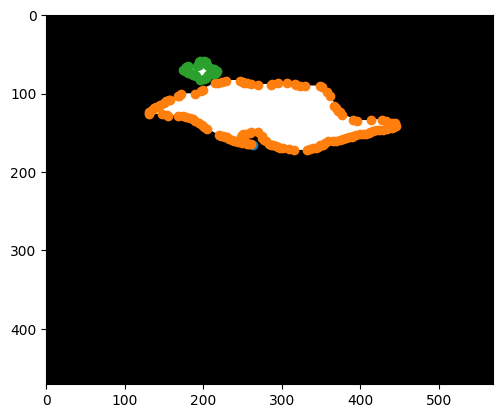

In [67]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
for svg_path in svg_paths:
    path = svg_path.path.replace("M", "").replace("Z", "").split("L")
    path_array = np.array([np.array(point.split(','), dtype=float) for point in path])
    plt.scatter(path_array[:, 0], path_array[:, 1])
    plt.imshow(mask_image, cmap='gray', alpha=1)
plt.show()